In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war

In [2]:
data = pd.read_csv("loan.csv")
war.filterwarnings("ignore")
# Display basic information about the dataset
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


/var/folders/gc/8snpm0_177b8g3mtx1g8mkcc0000gn/T/ipykernel_52764/3213383144.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("loan.csv")


In [3]:
#STEP 1 : Data understanding

In [4]:
#1.1 - Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


In [5]:
#1.2 Summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(data.describe())


Summary Statistics for Numerical Columns:
                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.0

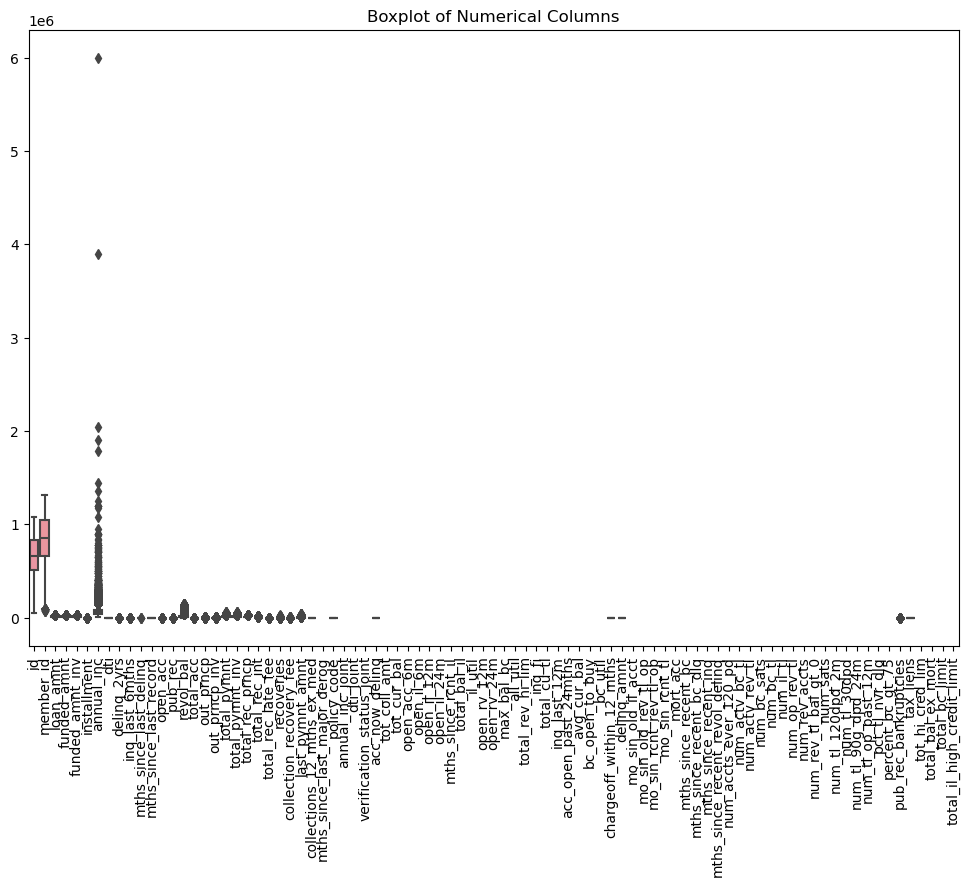

In [6]:
#1.3 - Check for outliers in numerical columns (using box plots)
numerical_cols = data.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[numerical_cols])
plt.title('Boxplot of Numerical Columns')
plt.xticks(rotation=90)
plt.show()

In [7]:
#1.4 Check data types and unique values for categorical columns
print("\nData Types and Unique Values for Categorical Columns:")
for col in data.select_dtypes(include='object').columns:
    print(f"Column: {col}, Data Type: {data[col].dtype}, Unique Values: {data[col].nunique()}")


Data Types and Unique Values for Categorical Columns:
Column: term, Data Type: object, Unique Values: 2
Column: int_rate, Data Type: object, Unique Values: 371
Column: grade, Data Type: object, Unique Values: 7
Column: sub_grade, Data Type: object, Unique Values: 35
Column: emp_title, Data Type: object, Unique Values: 28820
Column: emp_length, Data Type: object, Unique Values: 11
Column: home_ownership, Data Type: object, Unique Values: 5
Column: verification_status, Data Type: object, Unique Values: 3
Column: issue_d, Data Type: object, Unique Values: 55
Column: loan_status, Data Type: object, Unique Values: 3
Column: pymnt_plan, Data Type: object, Unique Values: 1
Column: url, Data Type: object, Unique Values: 39717
Column: desc, Data Type: object, Unique Values: 26526
Column: purpose, Data Type: object, Unique Values: 14
Column: title, Data Type: object, Unique Values: 19615
Column: zip_code, Data Type: object, Unique Values: 823
Column: addr_state, Data Type: object, Unique Values

In [8]:
# Check for inconsistencies or unusual values in categorical columns
# Example: Check unique values for 'loan_status' column
print("\nUnique Values for 'loan_status' Column:")
print(data['loan_status'].value_counts())


Unique Values for 'loan_status' Column:
loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64


In [9]:
# Step 2: Data Cleaning and Manipulation

#2.1
#Identify Columns with Significant Missing Data
missing_values = data.isnull().sum() / len(data)
missing_values = missing_values[missing_values > 0.5]
cols_to_drop = missing_values.index.tolist()

# Drop columns with significant missing data
data = data.drop(columns=cols_to_drop)

In [10]:
print(data.dtypes)

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [11]:
#2.2 chanding vlaues of columns into required format


data['term'] = data['term'].str.extract('(\d+)').astype(int)  # Extract numeric part and convert to int
data['int_rate'] = data['int_rate'].str.rstrip('%').astype(float)  # Remove '%' and convert to float
data['revol_util'] = data['revol_util'].str.rstrip('%').astype(float)  # Remove '%' and convert to float
data['issue_d'] = pd.to_datetime(data['issue_d'], format='%b-%y')  # Convert to datetime format
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'], format='%b-%y')  # Convert to datetime format
data['last_pymnt_d'] = pd.to_datetime(data['last_pymnt_d'], format='%b-%y')  # Convert to datetime format
data['last_credit_pull_d'] = pd.to_datetime(data['last_credit_pull_d'], format='%b-%y')  # Convert to datetime format
data['emp_length'] = data['emp_length'].replace({'< 1 year': '0 years', '10+ years': '10 years'})  # Replace values
data['emp_length'] = data['emp_length'].str.extract('(\d+)').astype(float)  # Extract numeric part and convert to float
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int
data['tax_liens']=data['tax_liens'].fillna(0.0)

In [12]:
#2.2 : Converting columns into corresponding correct DTypes
dtype_mapping = {
    'id': 'int64',
    'member_id': 'int64',
    'loan_amnt': 'int64',
    'funded_amnt': 'int64',
    'funded_amnt_inv': 'float64',
    'term': 'category',  # Assuming 'term' is categorical
    'int_rate': 'float64',  # Assuming 'int_rate' is a numerical value
    'installment': 'float64',
    'grade': 'category',
    'sub_grade': 'category',
    'emp_title': 'object',
    'emp_length': 'float64',
    'home_ownership': 'category',
    'annual_inc': 'float64',
    'verification_status': 'category',
    'issue_d': 'datetime64[ns]',  # Convert 'issue_d' to datetime format
    'loan_status': 'category',
    'pymnt_plan': 'category',
    'url': 'object',
    'desc': 'object',
    'purpose': 'category',
    'title': 'object',
    'zip_code': 'category',
    'addr_state': 'category',
    'dti': 'float64',
    'delinq_2yrs': 'int64',
    'earliest_cr_line': 'datetime64[ns]',  # Convert 'earliest_cr_line' to datetime format
    'inq_last_6mths': 'int64',
    'open_acc': 'int64',
    'pub_rec': 'int64',
    'revol_bal': 'int64',
    'revol_util': 'float64',  # Assuming 'revol_util' is a numerical value
    'total_acc': 'int64',
    'initial_list_status': 'category',
    'out_prncp': 'float64',
    'out_prncp_inv': 'float64',
    'total_pymnt': 'float64',
    'total_pymnt_inv': 'float64',
    'total_rec_prncp': 'float64',
    'total_rec_int': 'float64',
    'total_rec_late_fee': 'float64',
    'recoveries': 'float64',
    'collection_recovery_fee': 'float64',
    'last_pymnt_d': 'datetime64[ns]',  # Convert 'last_pymnt_d' to datetime format
    'last_pymnt_amnt': 'float64',
    'last_credit_pull_d': 'datetime64[ns]',  # Convert 'last_credit_pull_d' to datetime format
    'collections_12_mths_ex_med': 'float64',
    'policy_code': 'int64',
    'application_type': 'category',
    'acc_now_delinq': 'int64',
    'chargeoff_within_12_mths': 'float64',
    'delinq_amnt': 'int64',
    'pub_rec_bankruptcies': 'int64',  # Convert 'pub_rec_bankruptcies' to int64
    'tax_liens': 'int64'
}

# Apply dtype mapping to the DataFrame
data = data.astype(dtype_mapping)

# Confirm the changes
print(data.dtypes)

id                                     int64
member_id                              int64
loan_amnt                              int64
funded_amnt                            int64
funded_amnt_inv                      float64
term                                category
int_rate                             float64
installment                          float64
grade                               category
sub_grade                           category
emp_title                             object
emp_length                           float64
home_ownership                      category
annual_inc                           float64
verification_status                 category
issue_d                       datetime64[ns]
loan_status                         category
pymnt_plan                          category
url                                   object
desc                                  object
purpose                             category
title                                 object
zip_code  

In [13]:
#2.3 Handling rows with missing values
missing_values = data.isnull().sum()
print("Missing Values before imputation:")
print(missing_values)

Missing Values before imputation:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12942
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line              

In [14]:
# Handle emp_title with 'Unknown'
data['emp_title'].fillna('Unknown', inplace=True)

# Handle emp_length with median imputation
emp_length_median = data['emp_length'].median()
data['emp_length'].fillna(emp_length_median, inplace=True)

# Drop the desc column as it has a large number of missing values
data.drop(columns=['desc'], inplace=True)


# Handle title with 'Unknown'
data['title'].fillna('Unknown', inplace=True)


# Impute revol_util with mean
revol_util_mean = data['revol_util'].mean()
data['revol_util'].fillna(revol_util_mean, inplace=True)

# Drop rows with missing last_pymnt_d and last_credit_pull_d as they are date columns
data.dropna(subset=['last_pymnt_d', 'last_credit_pull_d'], inplace=True)

# Impute collections_12_mths_ex_med with mode
collections_mode = data['collections_12_mths_ex_med'].mode()[0]
data['collections_12_mths_ex_med'].fillna(collections_mode, inplace=True)

# Impute chargeoff_within_12_mths with mode
chargeoff_mode = data['chargeoff_within_12_mths'].mode()[0]
data['chargeoff_within_12_mths'].fillna(chargeoff_mode, inplace=True)

# Impute tax_liens with mode
tax_liens_mode = data['tax_liens'].mode()[0]
data['tax_liens'].fillna(tax_liens_mode, inplace=True)


In [15]:
missing_values = data.isnull().sum()
print("Missing Values after imputation:")
print(missing_values)

Missing Values after imputation:
id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_u

In [16]:
numerical_columns = [
    'id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
    'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 
    'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
    'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
    'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 
    'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 
    'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 
    'tax_liens'
]

categorical_columns = [
    'term', 'grade', 'sub_grade', 'home_ownership', 
    'verification_status', 'loan_status', 'pymnt_plan', 
    'purpose', 'zip_code', 'addr_state', 'initial_list_status', 
    'application_type'
]

ordered_categorical_columns = [
    'term', 'grade', 'sub_grade'
]

unordered_categorical_columns = [
    'home_ownership', 'verification_status', 'loan_status', 
    'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 
    'initial_list_status', 'application_type'
]

object_columns = [
    'emp_title', 'url', 'desc', 'title'
]

datetime_columns = [
    'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'
]

len(numerical_columns)+len(ordered_categorical_columns)+len(unordered_categorical_columns)+len(object_columns)+len(datetime_columns)

54

In [17]:
#2.4 OutLier Treatment


# Check the summary statistics before outlier treatment
print("\nSummary Statistics before Outlier Treatment:")
print(data[numerical_columns].describe())

# Function to detect and handle outliers using IQR
def treat_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))

# Apply outlier treatment to numerical columns
for col in numerical_columns:
    treat_outliers(data, col)

# Check the summary statistics after outlier treatment
print("\nSummary Statistics after Outlier Treatment:")
print(data[numerical_columns].describe())



Summary Statistics before Outlier Treatment:
                 id     member_id     loan_amnt  funded_amnt  funded_amnt_inv  \
count  3.964400e+04  3.964400e+04  39644.000000  39644.00000     39644.000000   
mean   6.831571e+05  8.504905e+05  11225.073151  10952.84217     10403.925605   
std    2.107102e+05  2.657028e+05   7455.197984   7185.40898      7128.300533   
min    5.473400e+04  7.069900e+04    500.000000    500.00000         0.000000   
25%    5.162455e+05  6.668655e+05   5500.000000   5400.00000      5000.000000   
50%    6.656255e+05  8.508075e+05  10000.000000   9600.00000      8975.000000   
75%    8.377930e+05  1.047358e+06  15000.000000  15000.00000     14400.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.00000     35000.000000   

           int_rate   installment    emp_length    annual_inc           dti  \
count  39644.000000  39644.000000  39644.000000  3.964400e+04  39644.000000   
mean      12.017719    324.699200      4.948643  6.900832e+04     

In [18]:
#2.5 Removing Duplicate Rows

initial_row_count = data.shape[0]
data.drop_duplicates(inplace=True)
final_row_count = data.shape[0]

print(f"\nInitial number of rows: {initial_row_count}")
print(f"Final number of rows after removing duplicates: {final_row_count}")


Initial number of rows: 39644
Final number of rows after removing duplicates: 39644


In [19]:
#Step 3 : Data analysis
req_numerical_columns = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
    'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 
    'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 
    'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 
    'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
    'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 
    'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 
    'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 
    'tax_liens'
]

req_categorical_columns = [
    'term', 'grade', 'sub_grade', 'home_ownership', 
    'verification_status', 'pymnt_plan', 
    'purpose', 'zip_code', 'addr_state', 'initial_list_status', 
    'application_type','loan_status'
]

req_ordered_categorical_columns = [
    'term', 'grade', 'sub_grade'
]

req_unordered_categorical_columns = [
    'home_ownership', 'verification_status',
    'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 
    'initial_list_status', 'application_type','loan_status'
]

req_object_columns = [
    'emp_title', 'url', 'desc', 'title'
]

req_datetime_columns = [
    'issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'
]

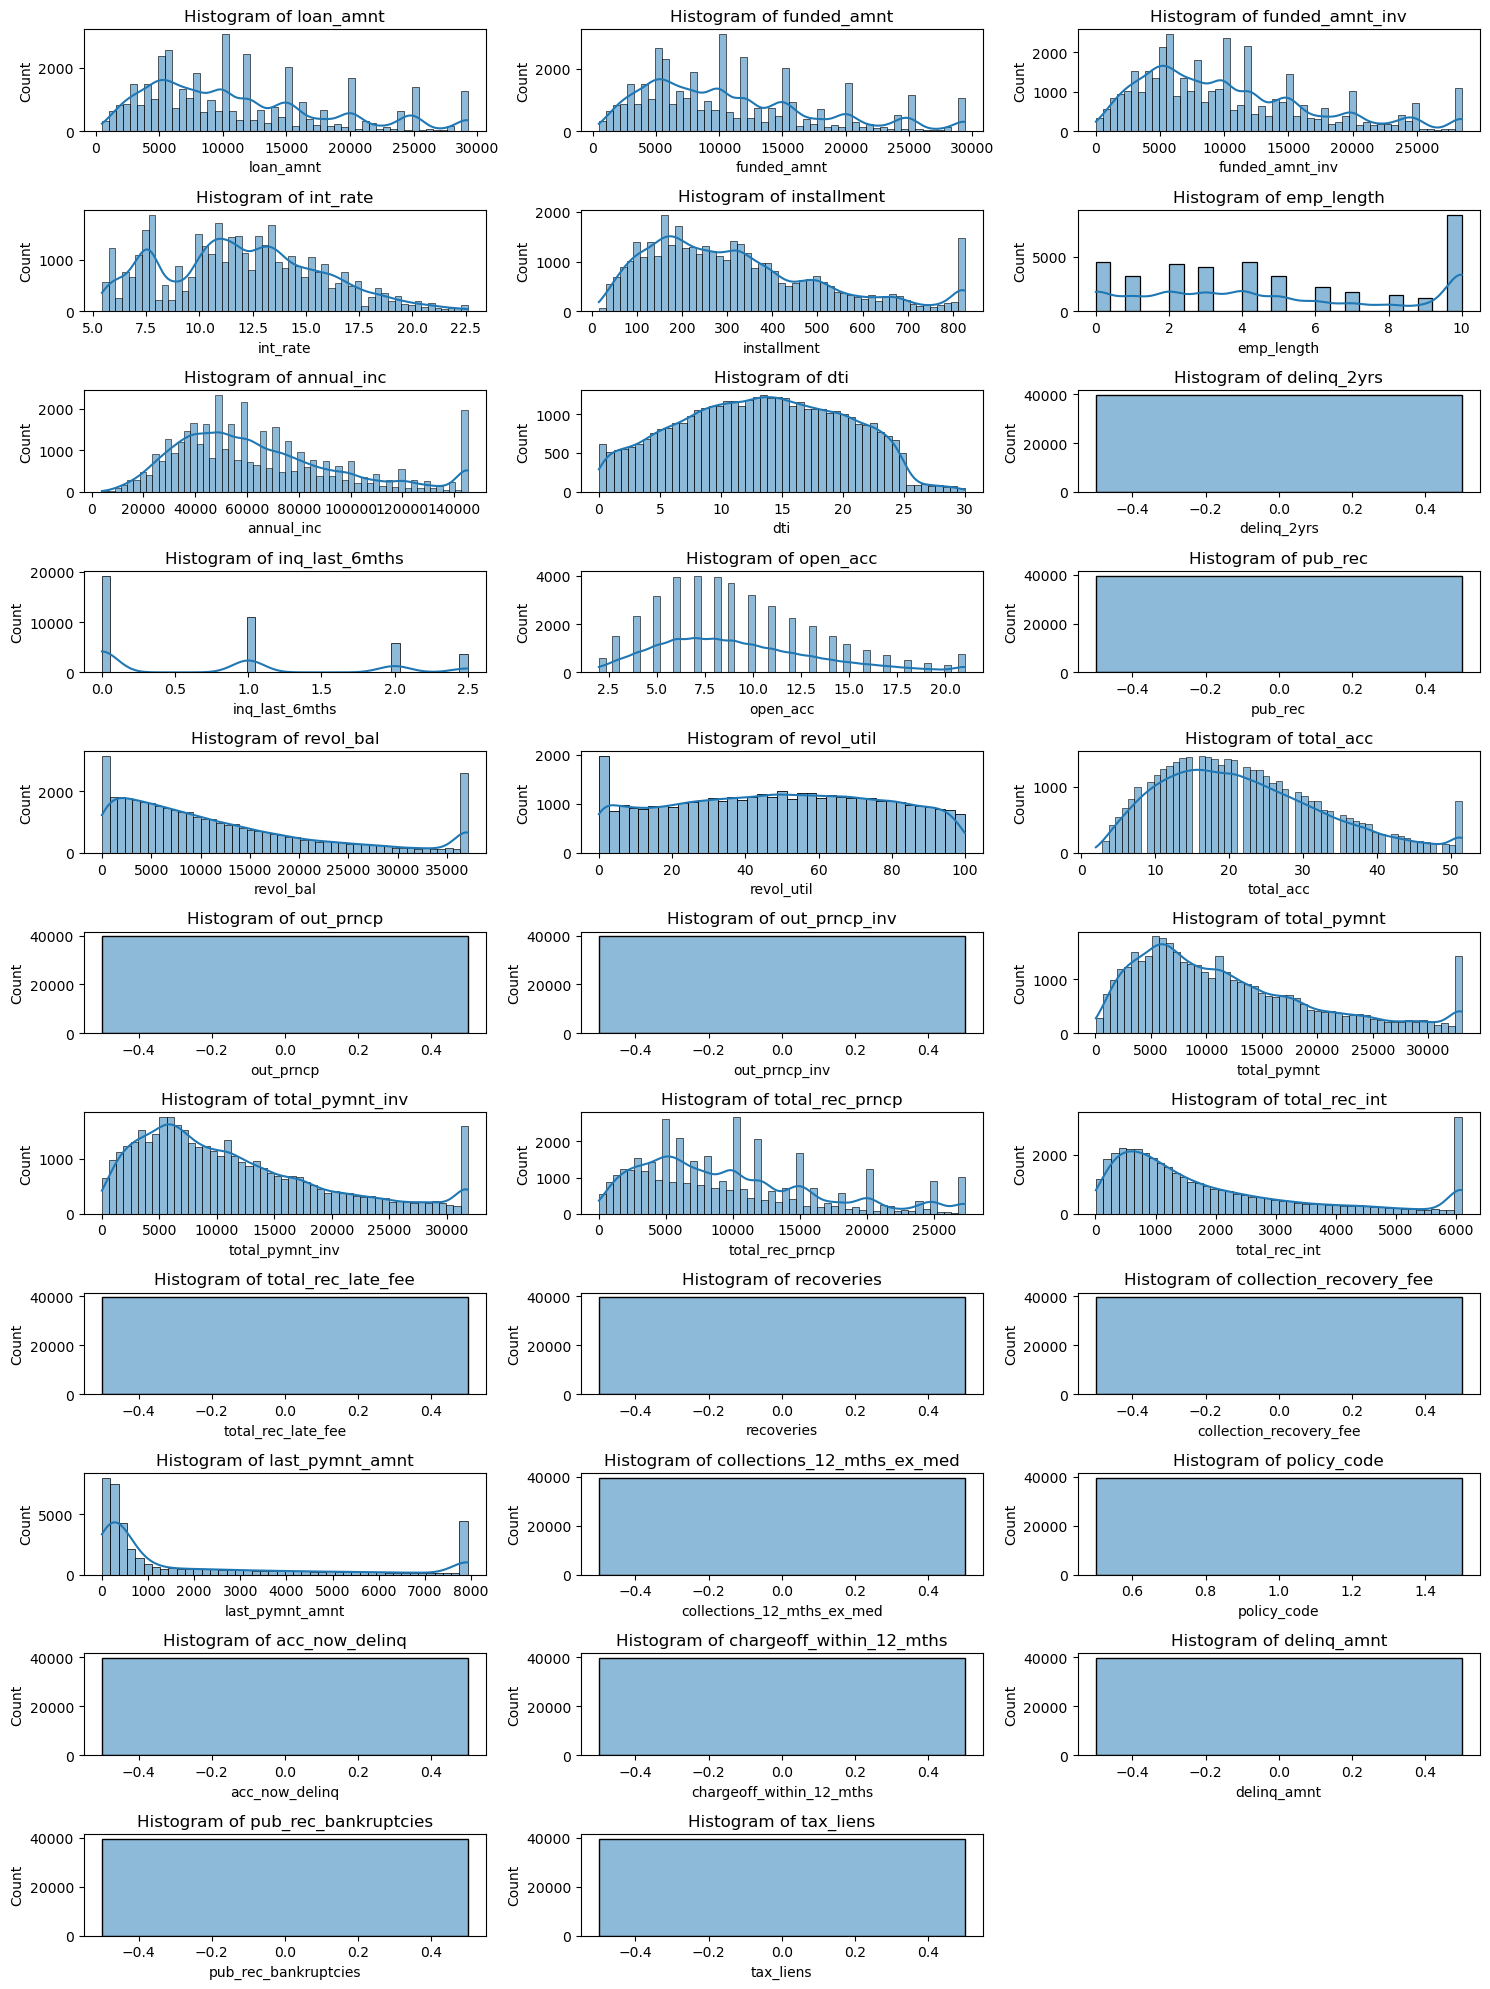

In [20]:
#3.1 univariate and segmented univariate analysis  and identifying important variables

#3.1.1  Unitvariate analysis of numerical variables
plt.figure(figsize=(15, 20))

num_cols = len(req_numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

for i, col in enumerate(req_numerical_columns):
    plt.subplot(num_rows, 3, i + 1)  # Adjust subplot layout dynamically
    sns.histplot(data=data, x=col, kde=True)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

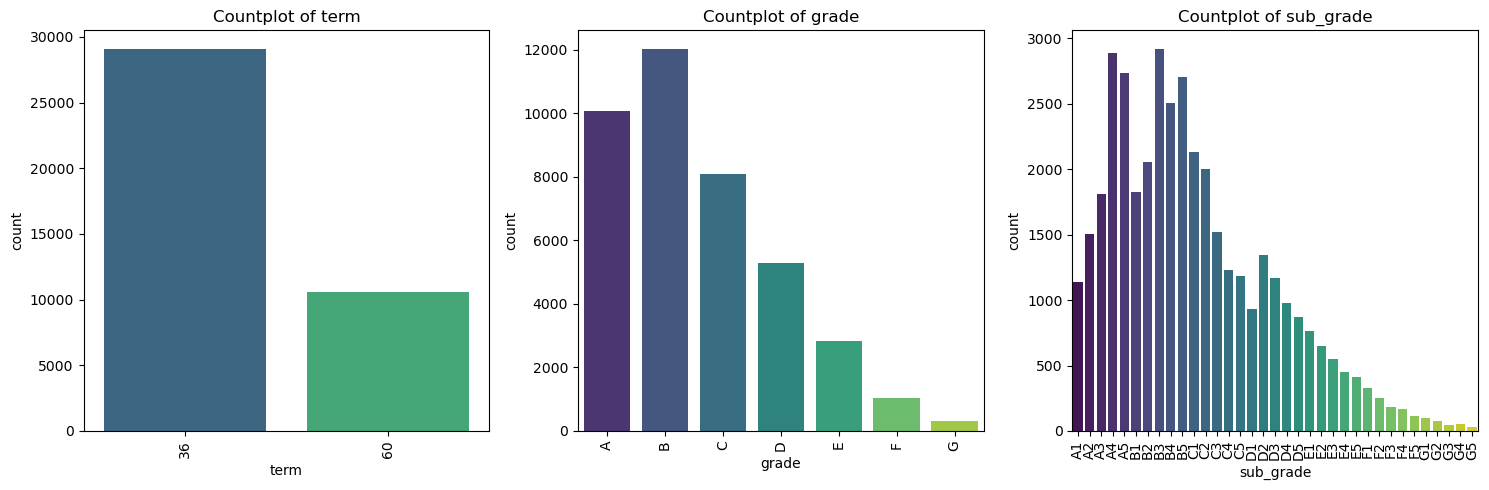

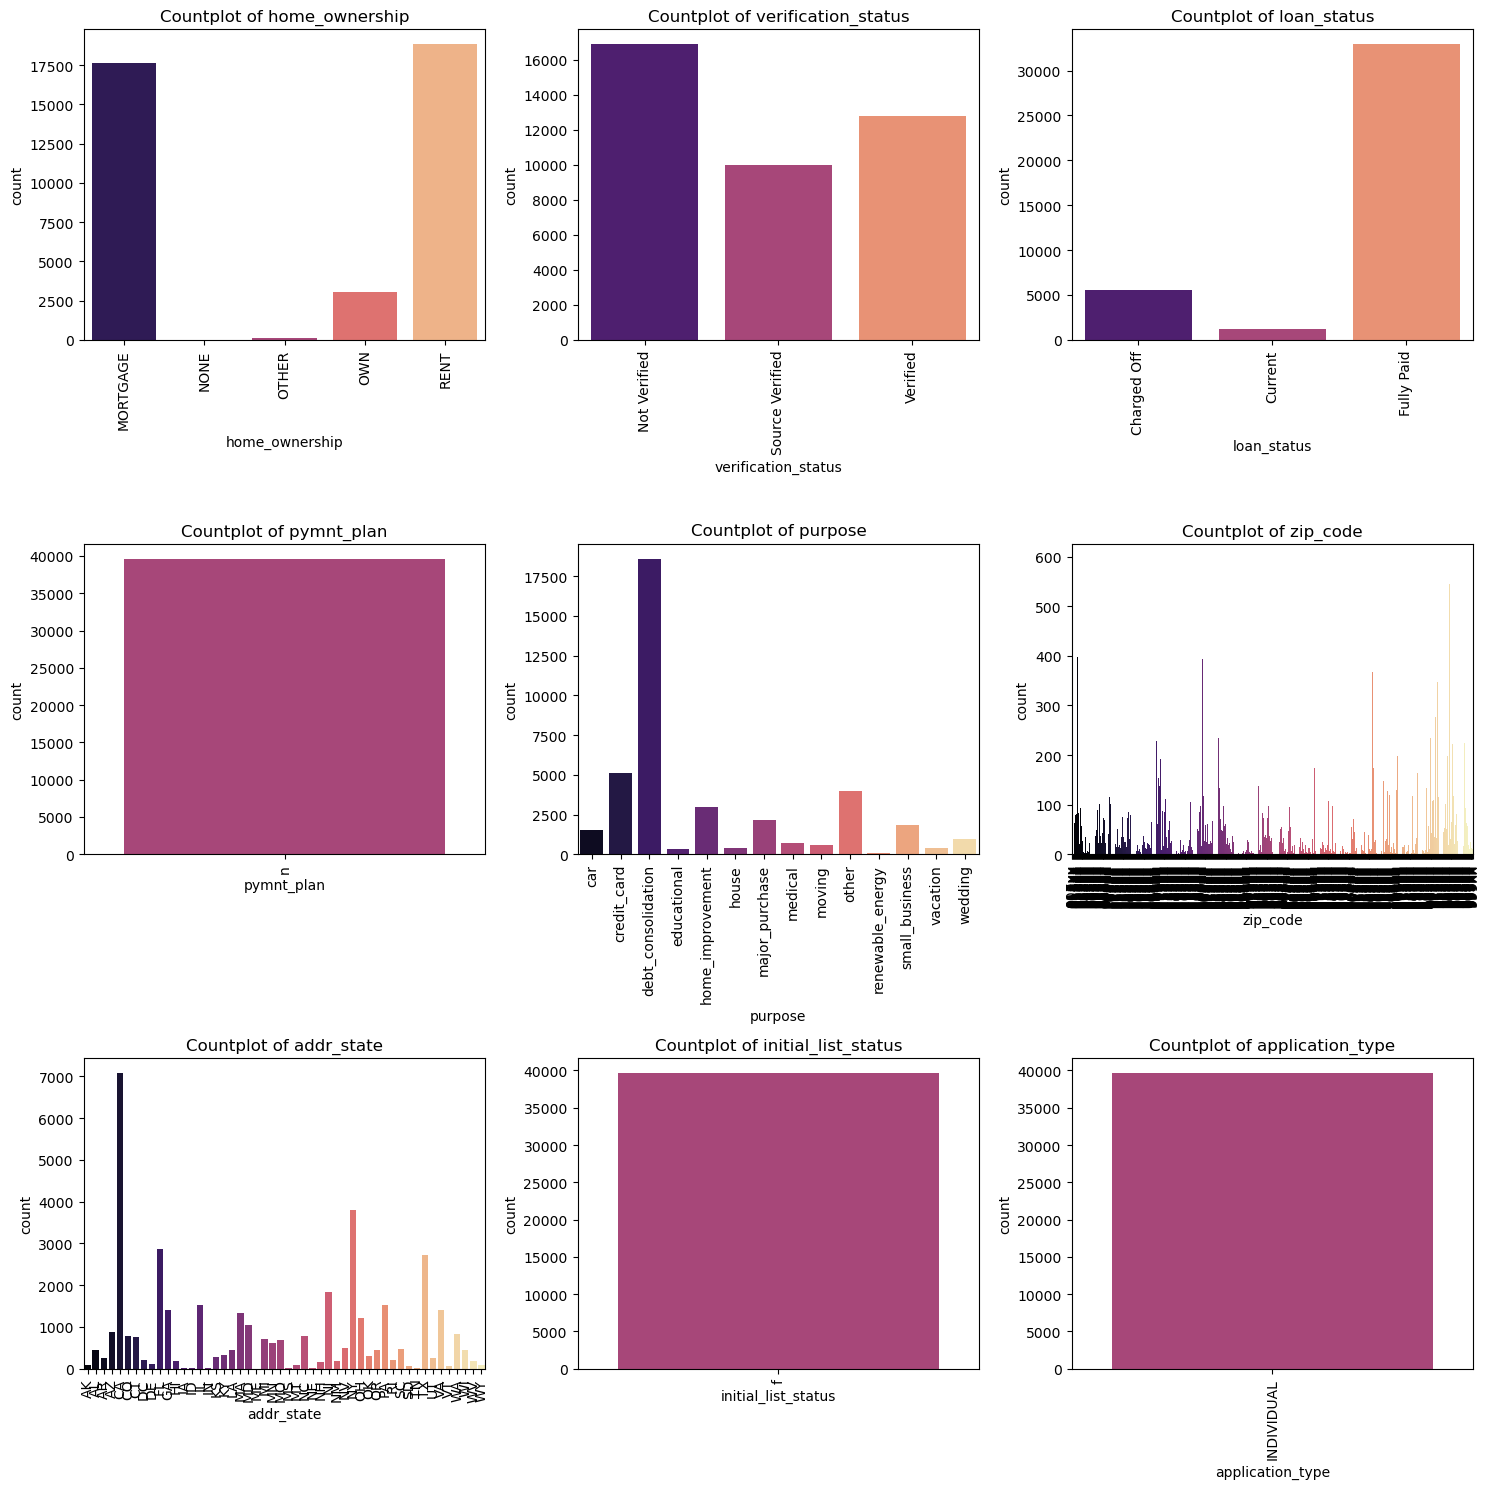

<Figure size 640x480 with 0 Axes>

In [21]:
#3.1.2  Unitvariate analysis of Categorical variables

num_ordered_rows = (len(ordered_categorical_columns) + 2) // 3
num_unordered_rows = (len(unordered_categorical_columns) + 2) // 3

# Plotting ordered categorical columns
plt.figure(figsize=(15, 5 * num_ordered_rows))
for i, col in enumerate(ordered_categorical_columns):
    plt.subplot(num_ordered_rows, 3, i + 1)  # Adjust subplot layout dynamically
    sns.countplot(data=data, x=col, palette='viridis')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Plotting unordered categorical columns
plt.figure(figsize=(15, 5 * num_unordered_rows))
for i, col in enumerate(unordered_categorical_columns):
    plt.subplot(num_unordered_rows, 3, i + 1)  # Adjust subplot layout dynamically
    sns.countplot(data=data, x=col, palette='magma')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

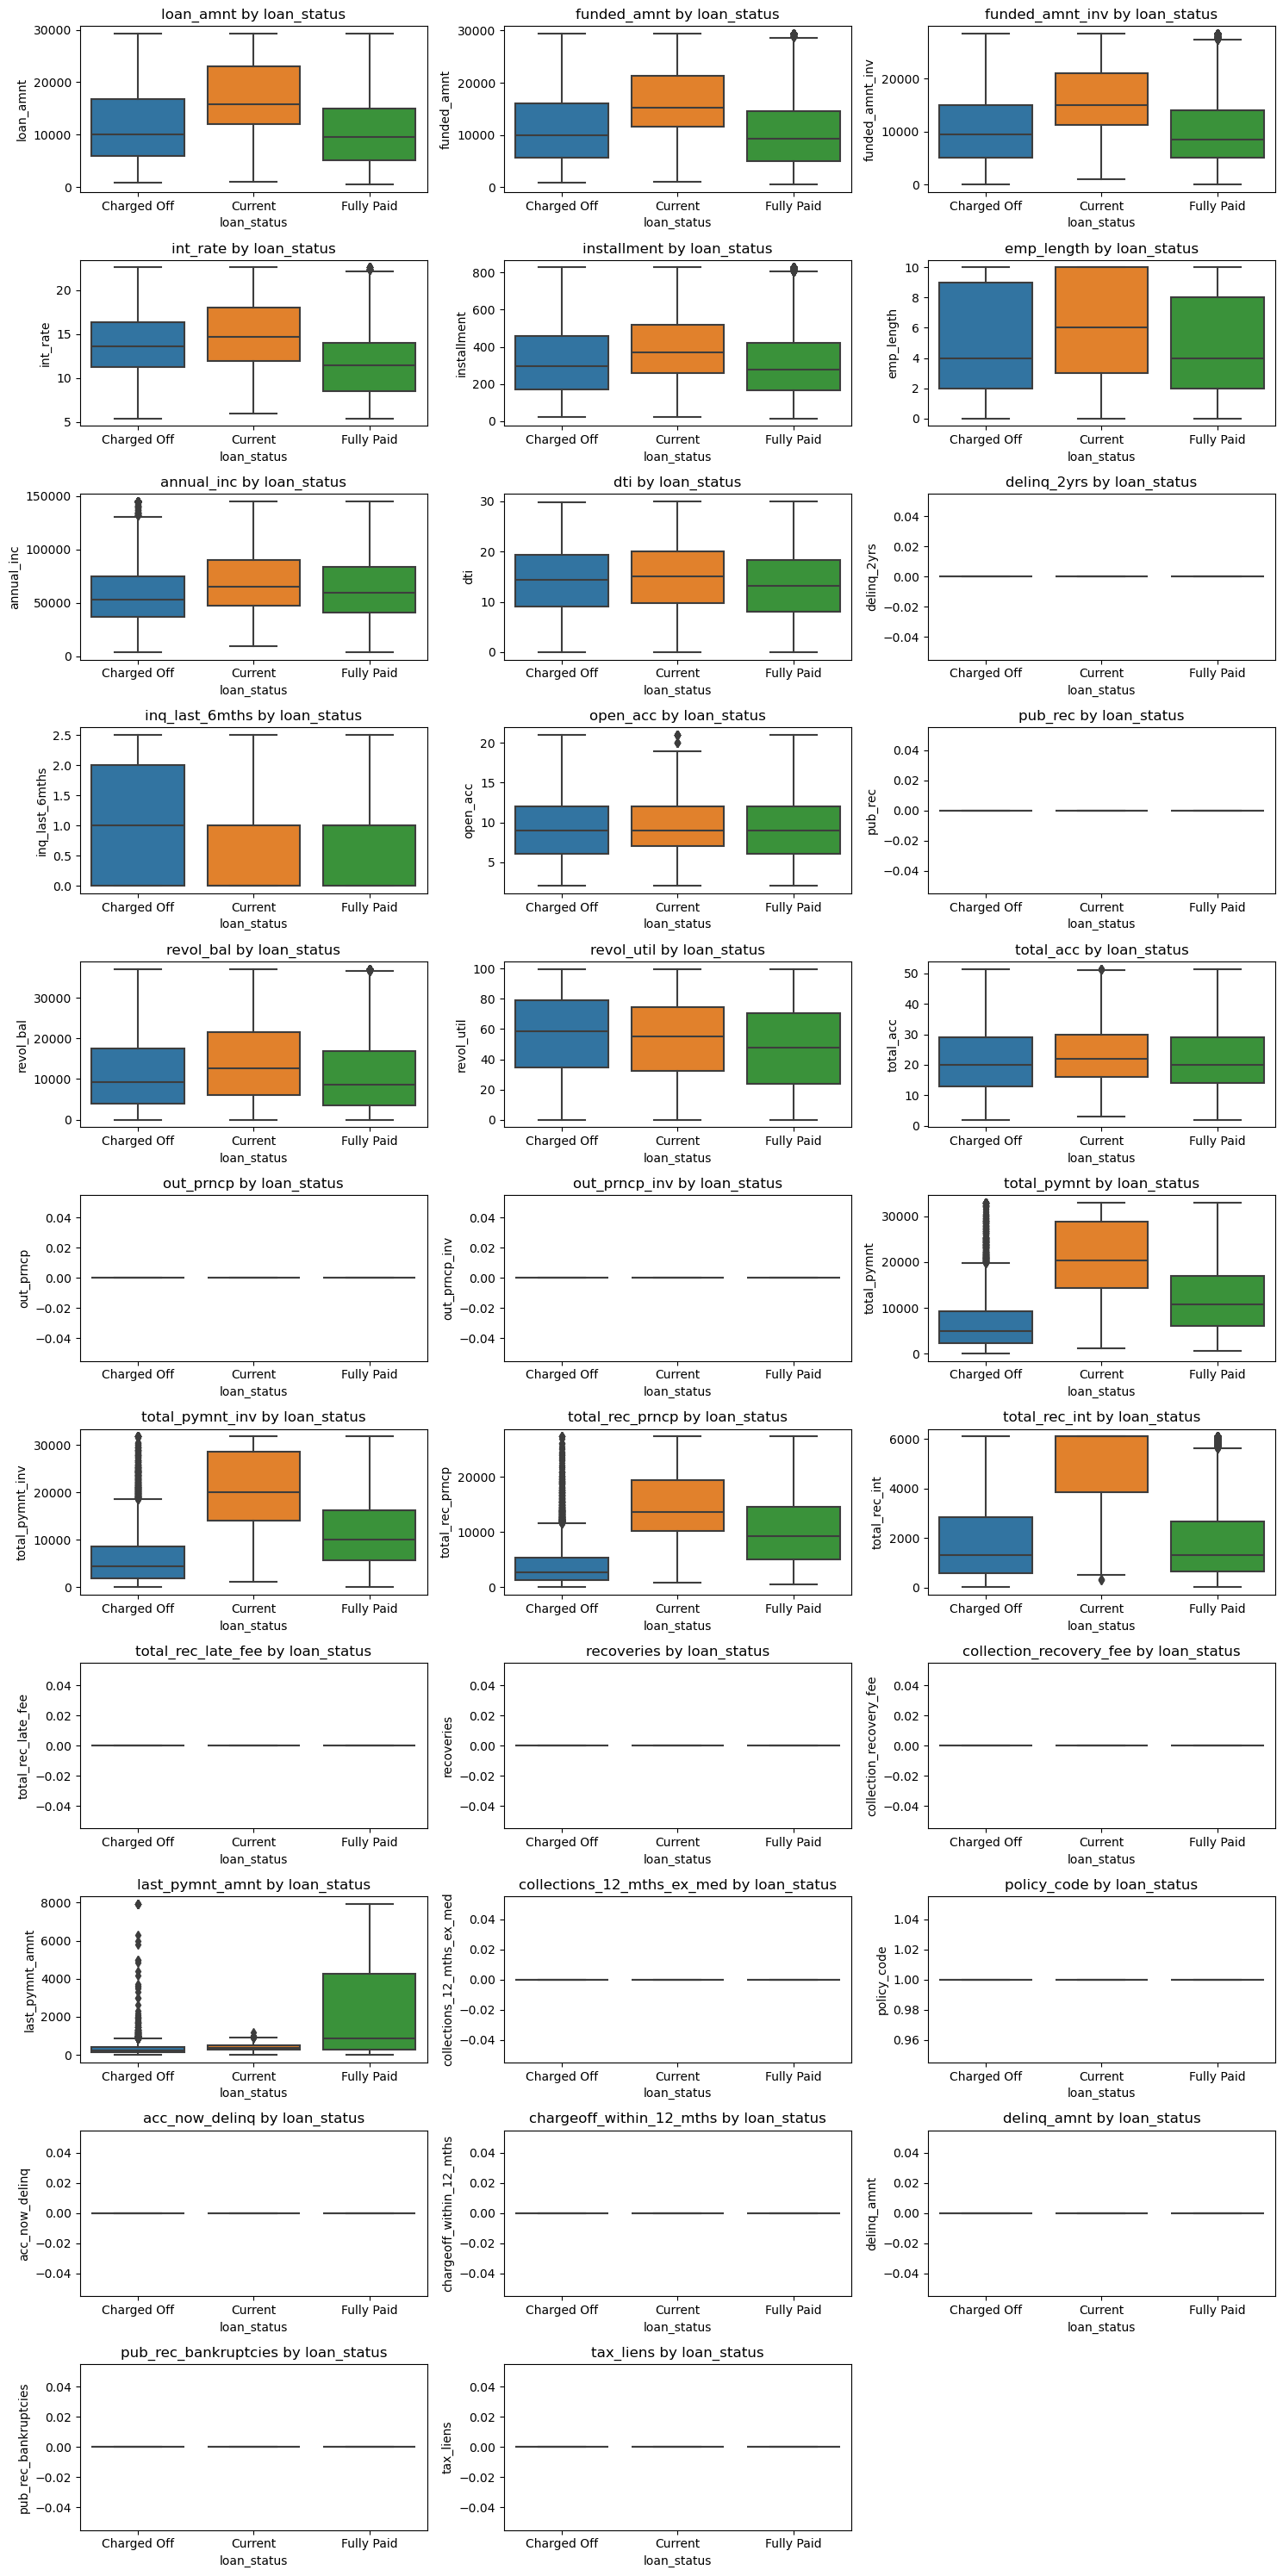

In [22]:
#3.1.3 segmented analysis of numerical variables with loan_status

plt.figure(figsize=(15, 30))
num_cols = len(req_numerical_columns)
num_rows = (num_cols // 3) + (num_cols % 3 > 0)

for i, col in enumerate(req_numerical_columns):
    plt.subplot(num_rows, 3, i + 1)
    sns.boxplot(data=data, x='loan_status', y=col)
    plt.title(f'{col} by loan_status')

plt.tight_layout()
plt.show()

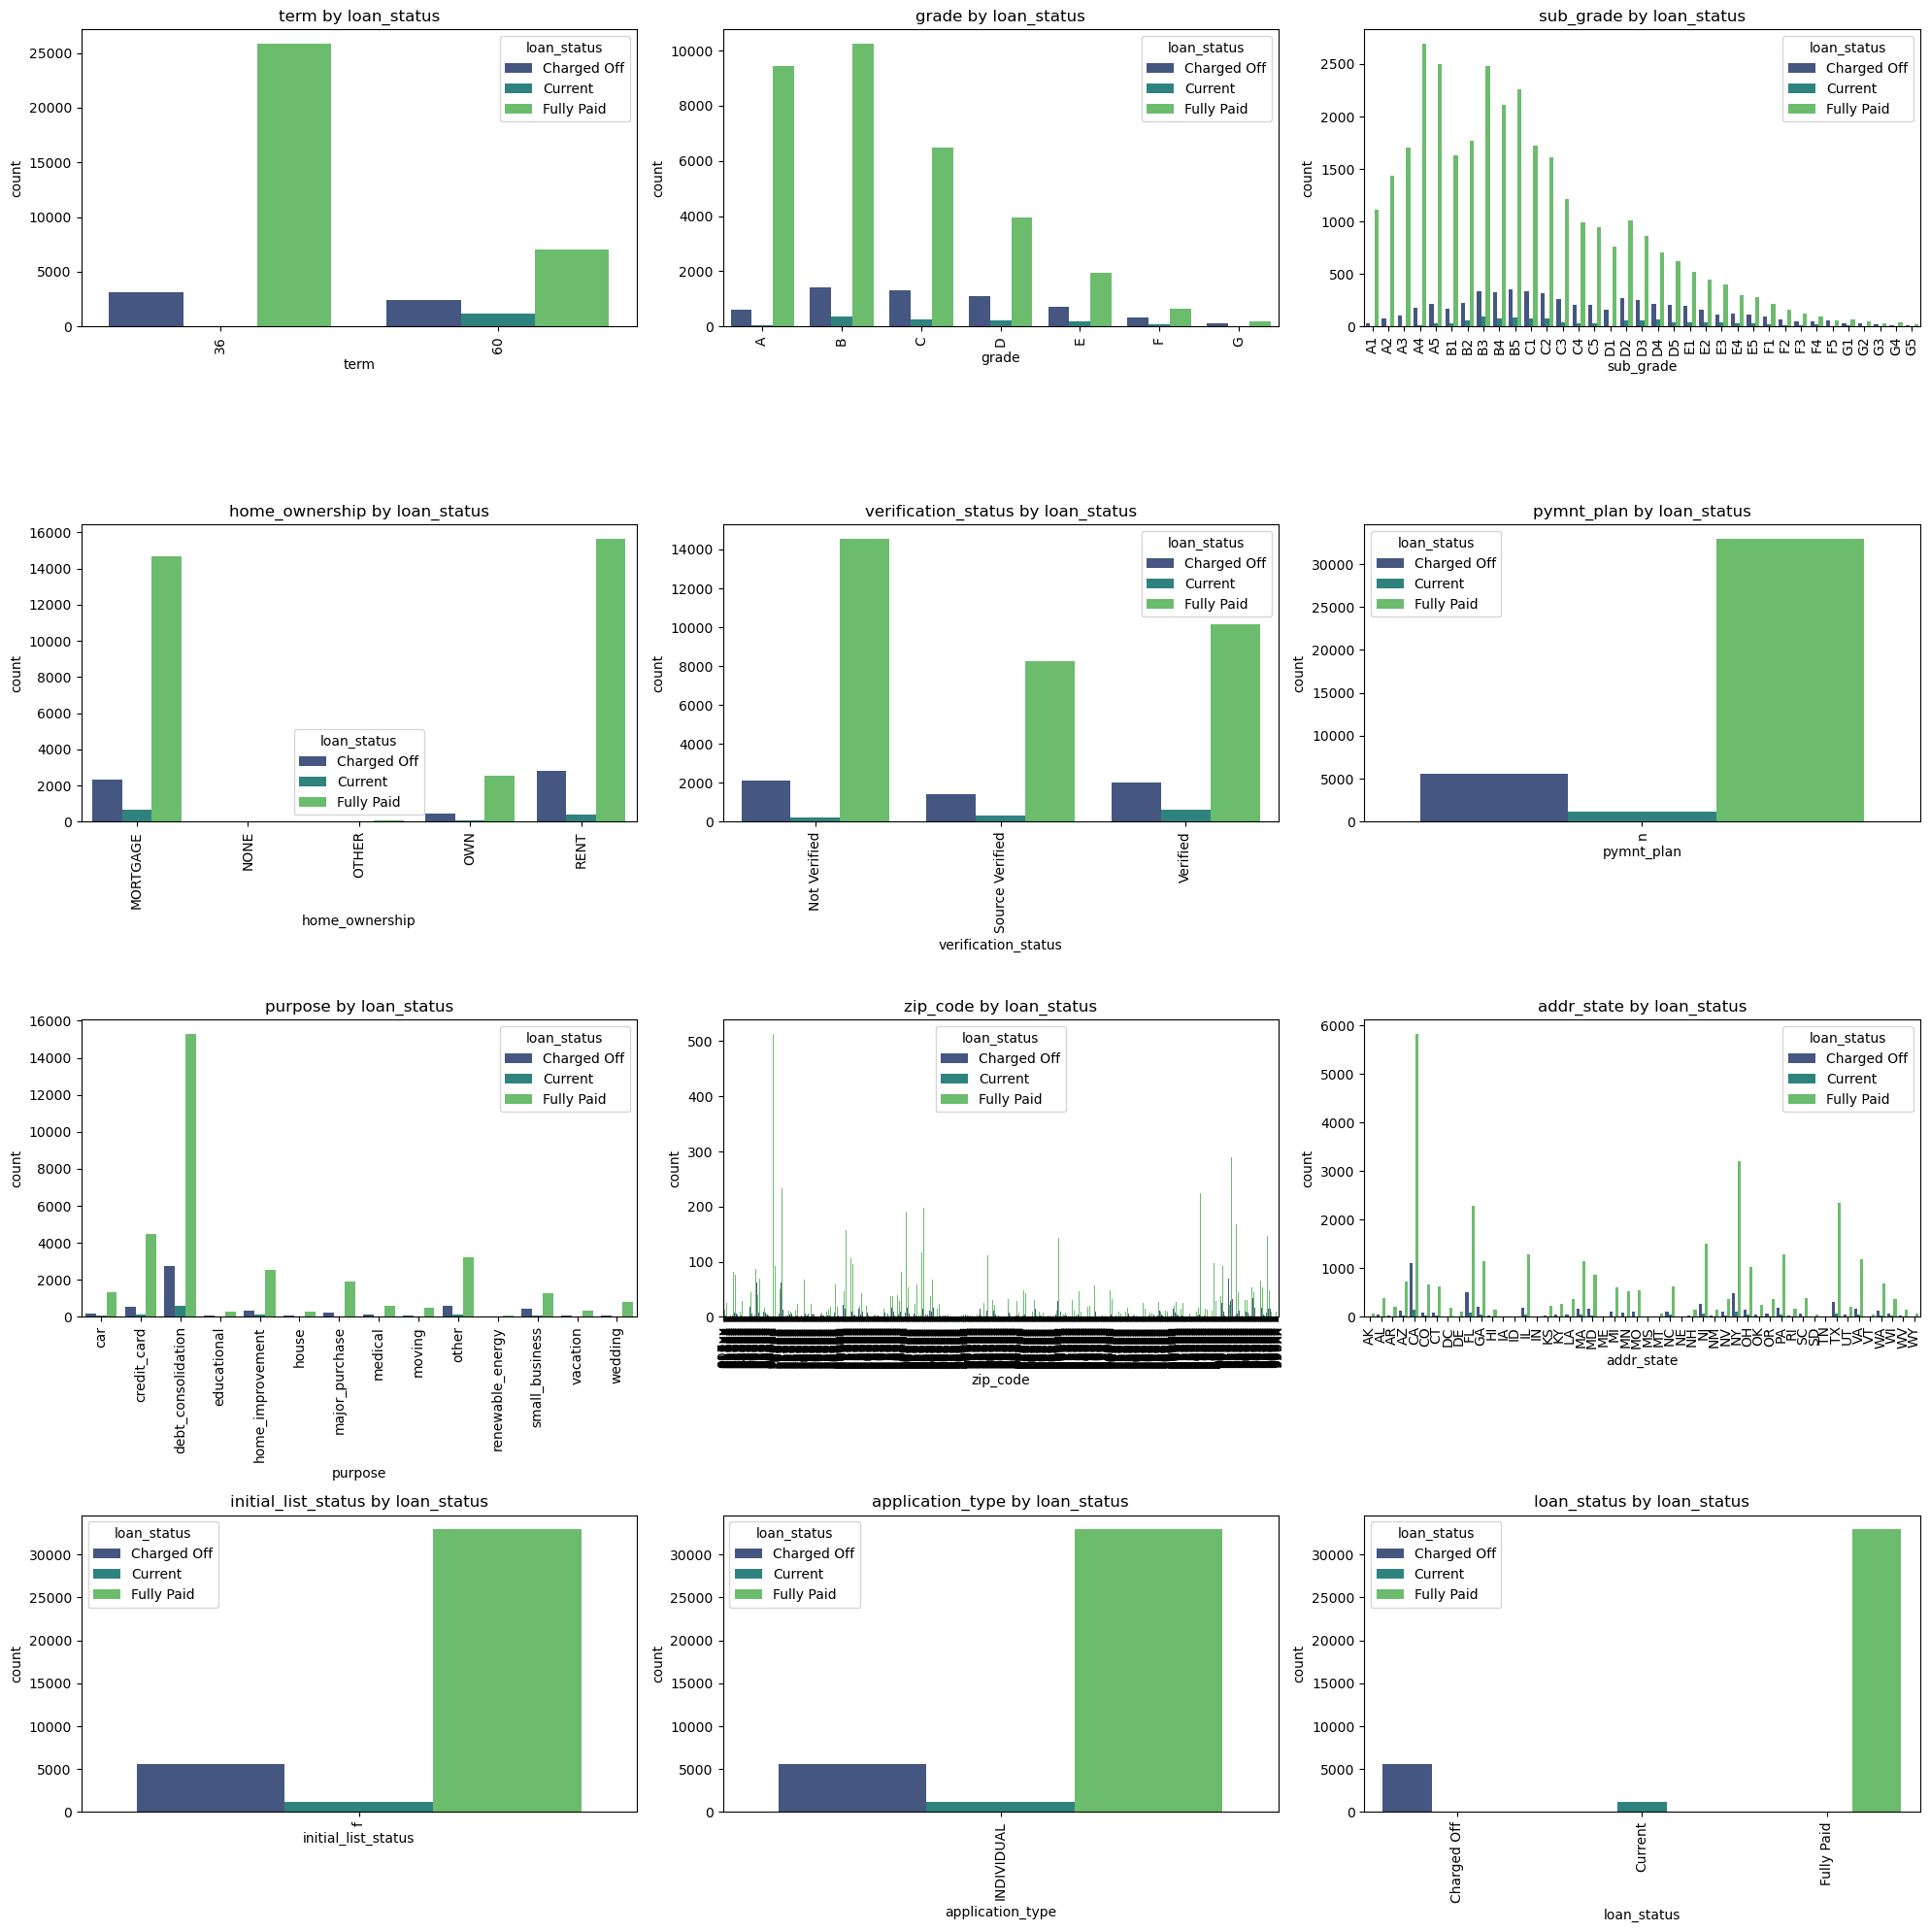

In [23]:
#3.1.4 segmented analysis of categorical variables with loan_status
num_cols = 3
num_rows = (len(req_categorical_columns) + num_cols - 1) // num_cols

plt.figure(figsize=(20, 5 * num_rows))

for i, col in enumerate(req_categorical_columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.countplot(data=data, x=col, hue='loan_status', palette='viridis')
    plt.title(f'{col} by loan_status')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [24]:
# 3.1.5 statistical tests or feature importance ranking

# t test for Numerical variables
from scipy.stats import ttest_ind
def t_test(data, num_var, target_var):
    group1 = data[data[target_var] == 'Fully Paid'][num_var].dropna()
    group2 = data[data[target_var] == 'Charged Off'][num_var].dropna()
    t_stat, p_val = ttest_ind(group1, group2)
    print(f"T-test result for {num_var}: p-value = {p_val}")

for col in req_numerical_columns:
    t_test(data, col, 'loan_status')
    
    
    
# Chi-square test for categorical variables
from scipy.stats import chi2_contingency
def chi_square_test(data, cat_var, target_var):
    contingency_table = pd.crosstab(data[cat_var], data[target_var])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-square test result for {cat_var}: p-value = {p}")

for col in req_categorical_columns:
    chi_square_test(data, col, 'loan_status')

T-test result for loan_amnt: p-value = 3.688043169845964e-32
T-test result for funded_amnt: p-value = 2.411501440369805e-29
T-test result for funded_amnt_inv: p-value = 6.02183193035754e-14
T-test result for int_rate: p-value = 0.0
T-test result for installment: p-value = 8.253731446336202e-09
T-test result for emp_length: p-value = 0.0026346885406152284
T-test result for annual_inc: p-value = 1.8737987200658028e-37
T-test result for dti: p-value = 1.1996374391346252e-19
T-test result for delinq_2yrs: p-value = nan
T-test result for inq_last_6mths: p-value = 2.2131449694757527e-44
T-test result for open_acc: p-value = 0.08641614608201795
T-test result for pub_rec: p-value = nan
T-test result for revol_bal: p-value = 0.0003483476781099634
T-test result for revol_util: p-value = 1.2318903083921244e-86
T-test result for total_acc: p-value = 6.356512470432852e-05
T-test result for out_prncp: p-value = nan
T-test result for out_prncp_inv: p-value = nan
T-test result for total_pymnt: p-value

In [25]:
# top variables which are strong indicators of default
# int_rate (p-value = 0.0)
# term (p-value = 0.0)
# grade (p-value = 0.0)
# sub_grade (p-value = 0.0)
# verification_status(p-value = 1.6541718948363707e-83)
# purpose (p-value = 3.151703336937961e-76)
# annnual_inc (p-value = 1.8737987200658028e-37)

In [26]:
#3.2 Bivariate analysis

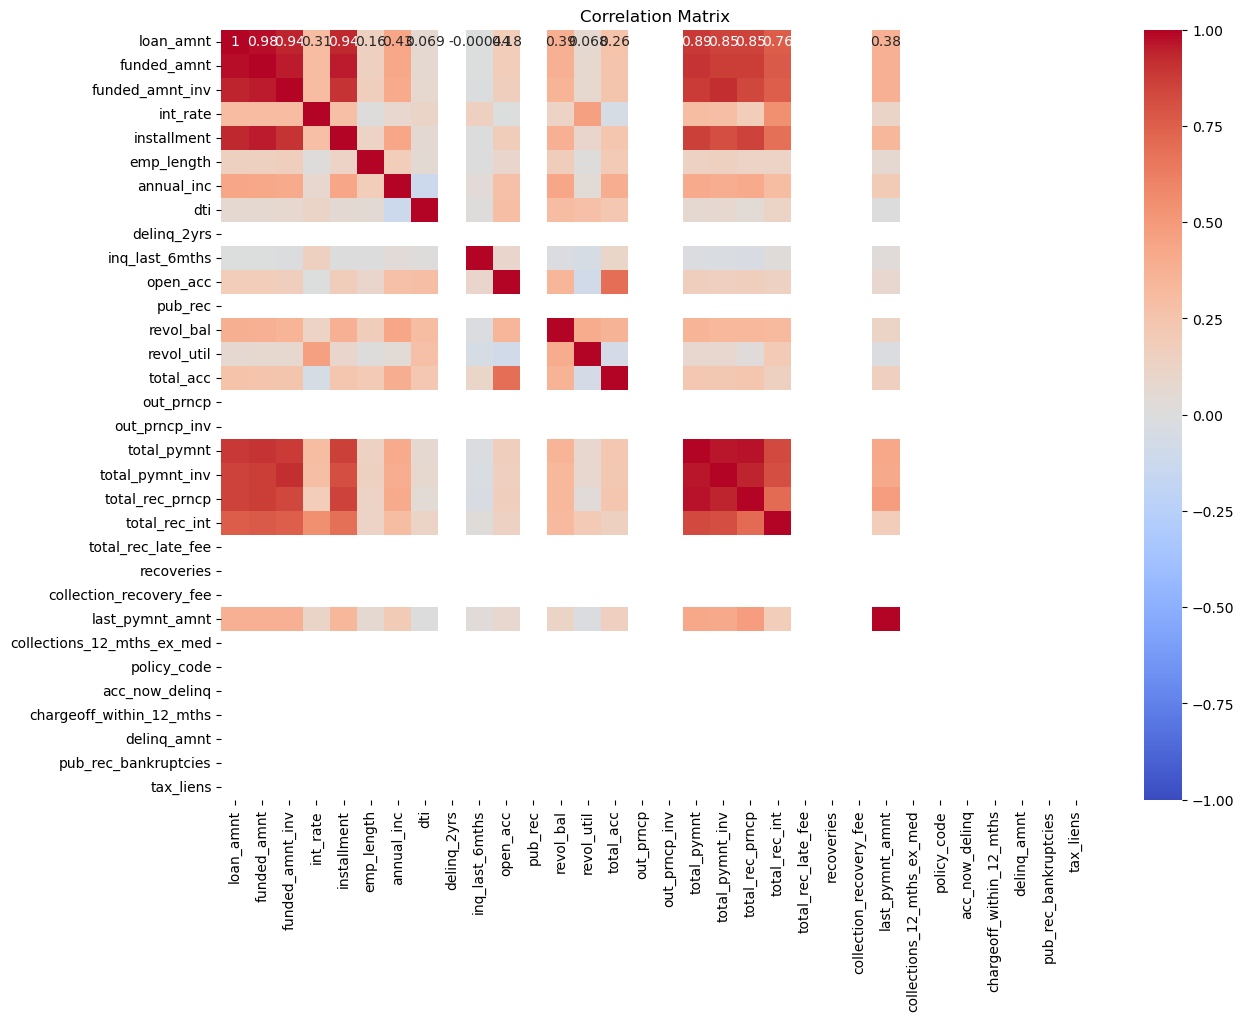

In [27]:
# 3.2.1 Numerical vs. Numerical


# Correlation matrix for numerical variables
correlation_matrix = data[req_numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

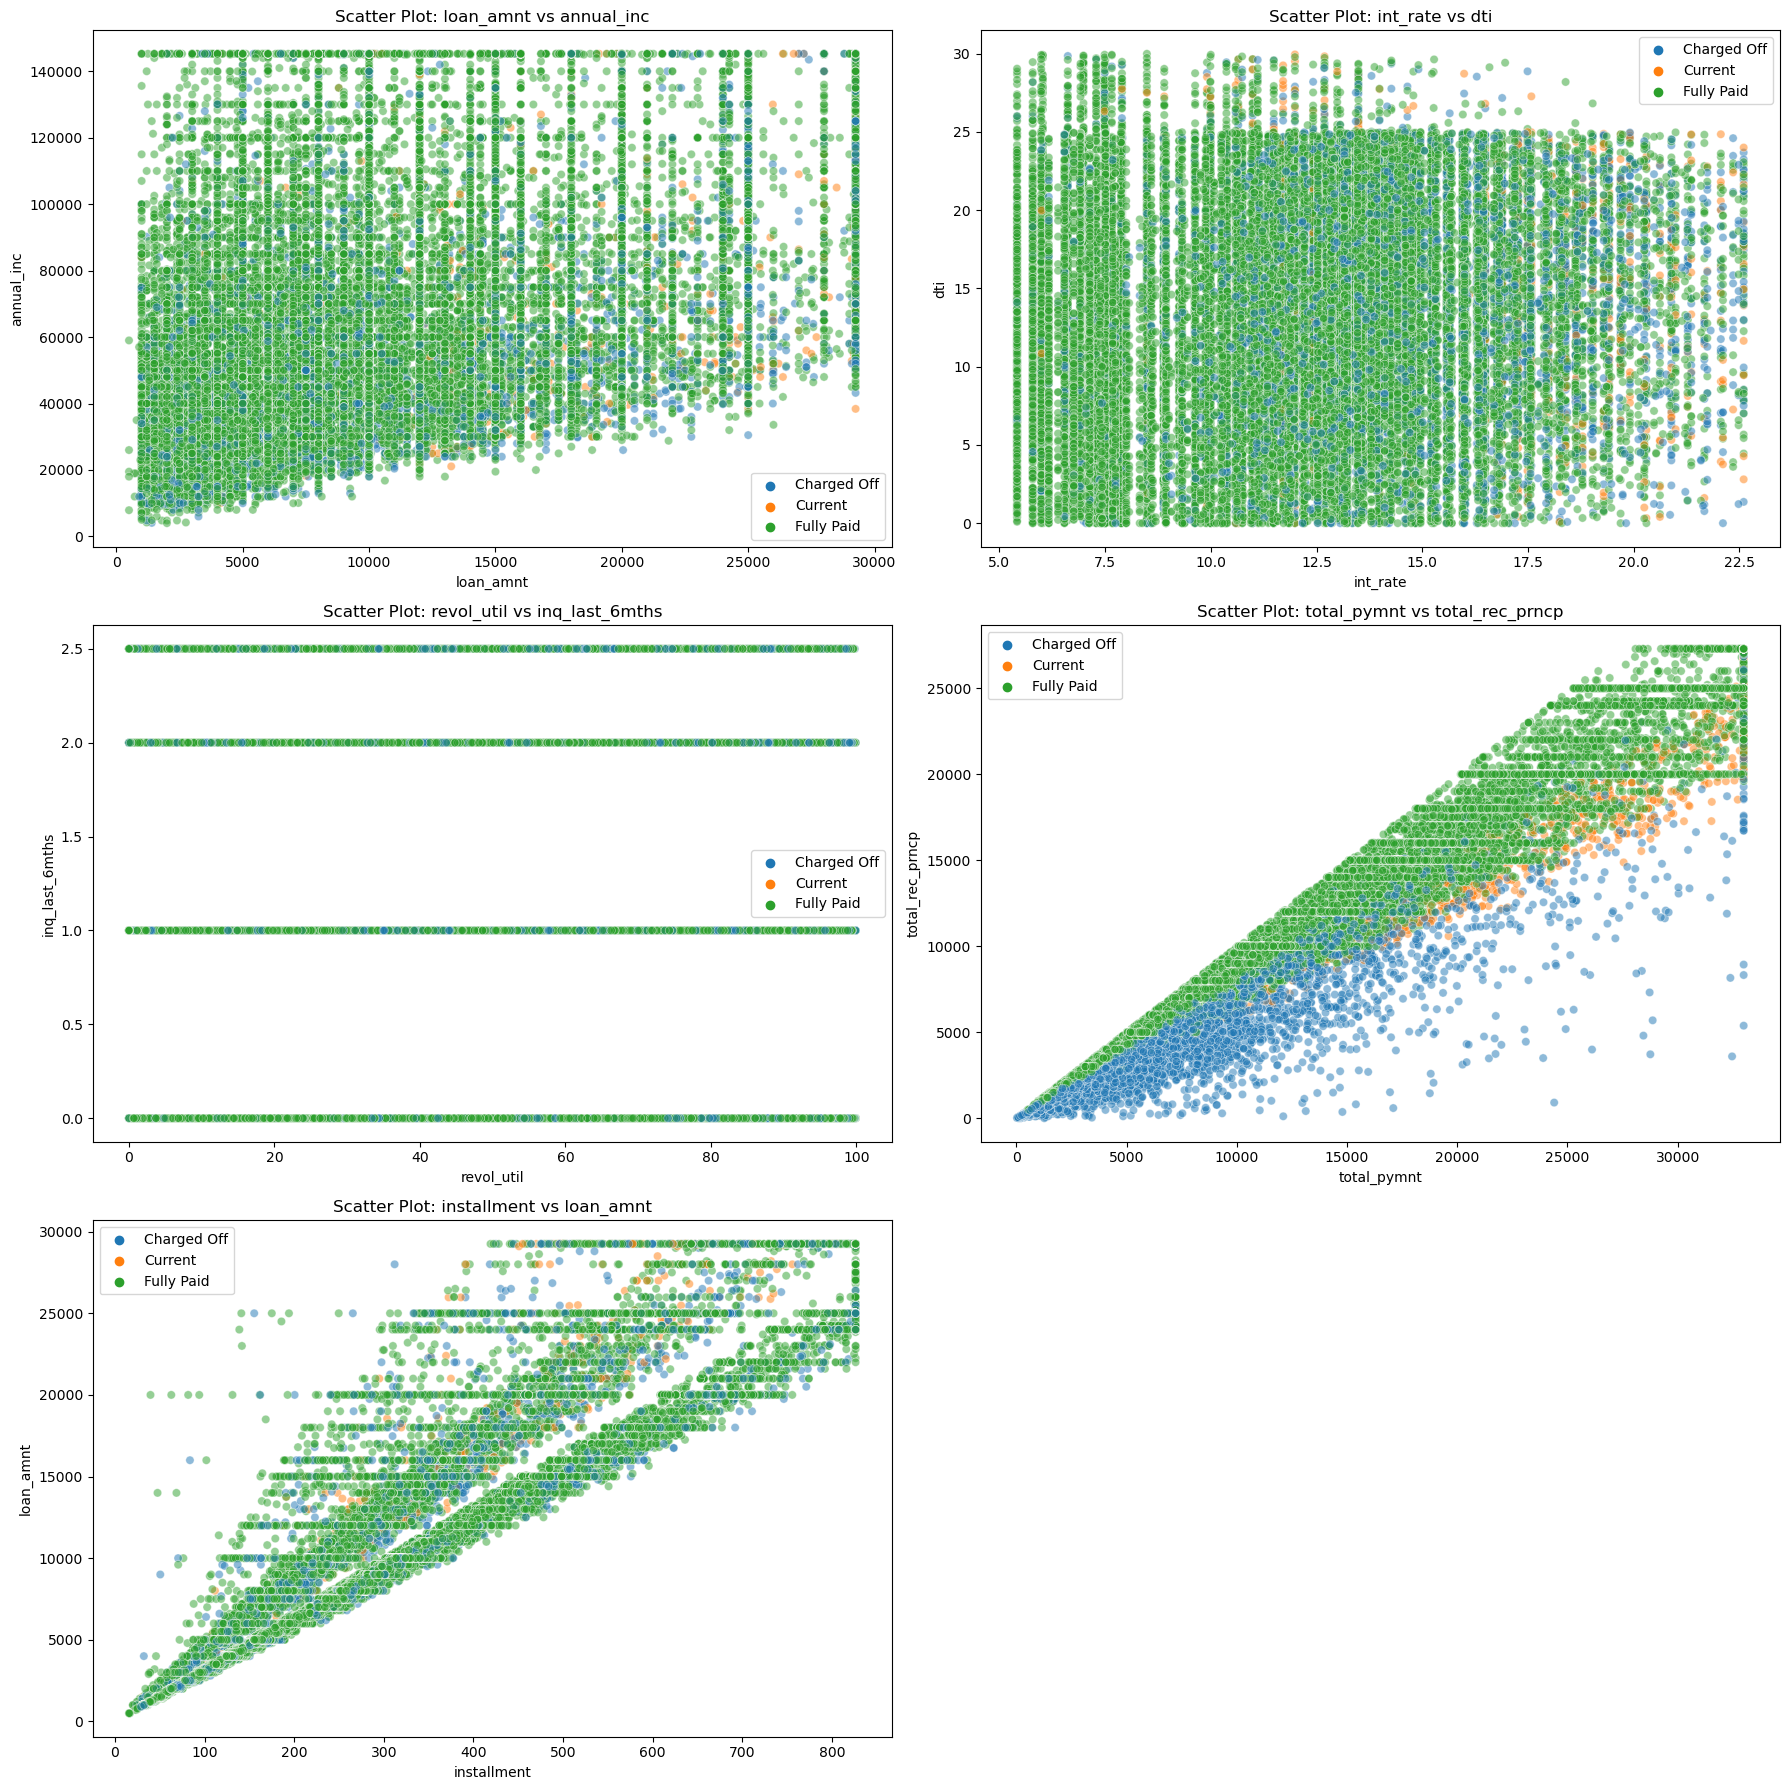

In [28]:
# Scatter plots for pairs of numerical variables
numerical_pairs = [
    ('loan_amnt', 'annual_inc'),
    ('int_rate', 'dti'),
    ('revol_util', 'inq_last_6mths'),
    ('total_pymnt', 'total_rec_prncp'),
    ('installment', 'loan_amnt')
]

# Scatter plots for pairs of numerical variables
plt.figure(figsize=(18, 18))
num_cols = len(numerical_pairs)
num_rows = (num_cols // 2) + (num_cols % 2 > 0)

for i, (var1, var2) in enumerate(numerical_pairs):
    plt.subplot(num_rows, 2, i + 1)
    sns.scatterplot(data=data, x=var1, y=var2, hue='loan_status', alpha=0.5)
    plt.title(f'Scatter Plot: {var1} vs {var2}')
    plt.legend(loc='best')

plt.tight_layout()
plt.show()

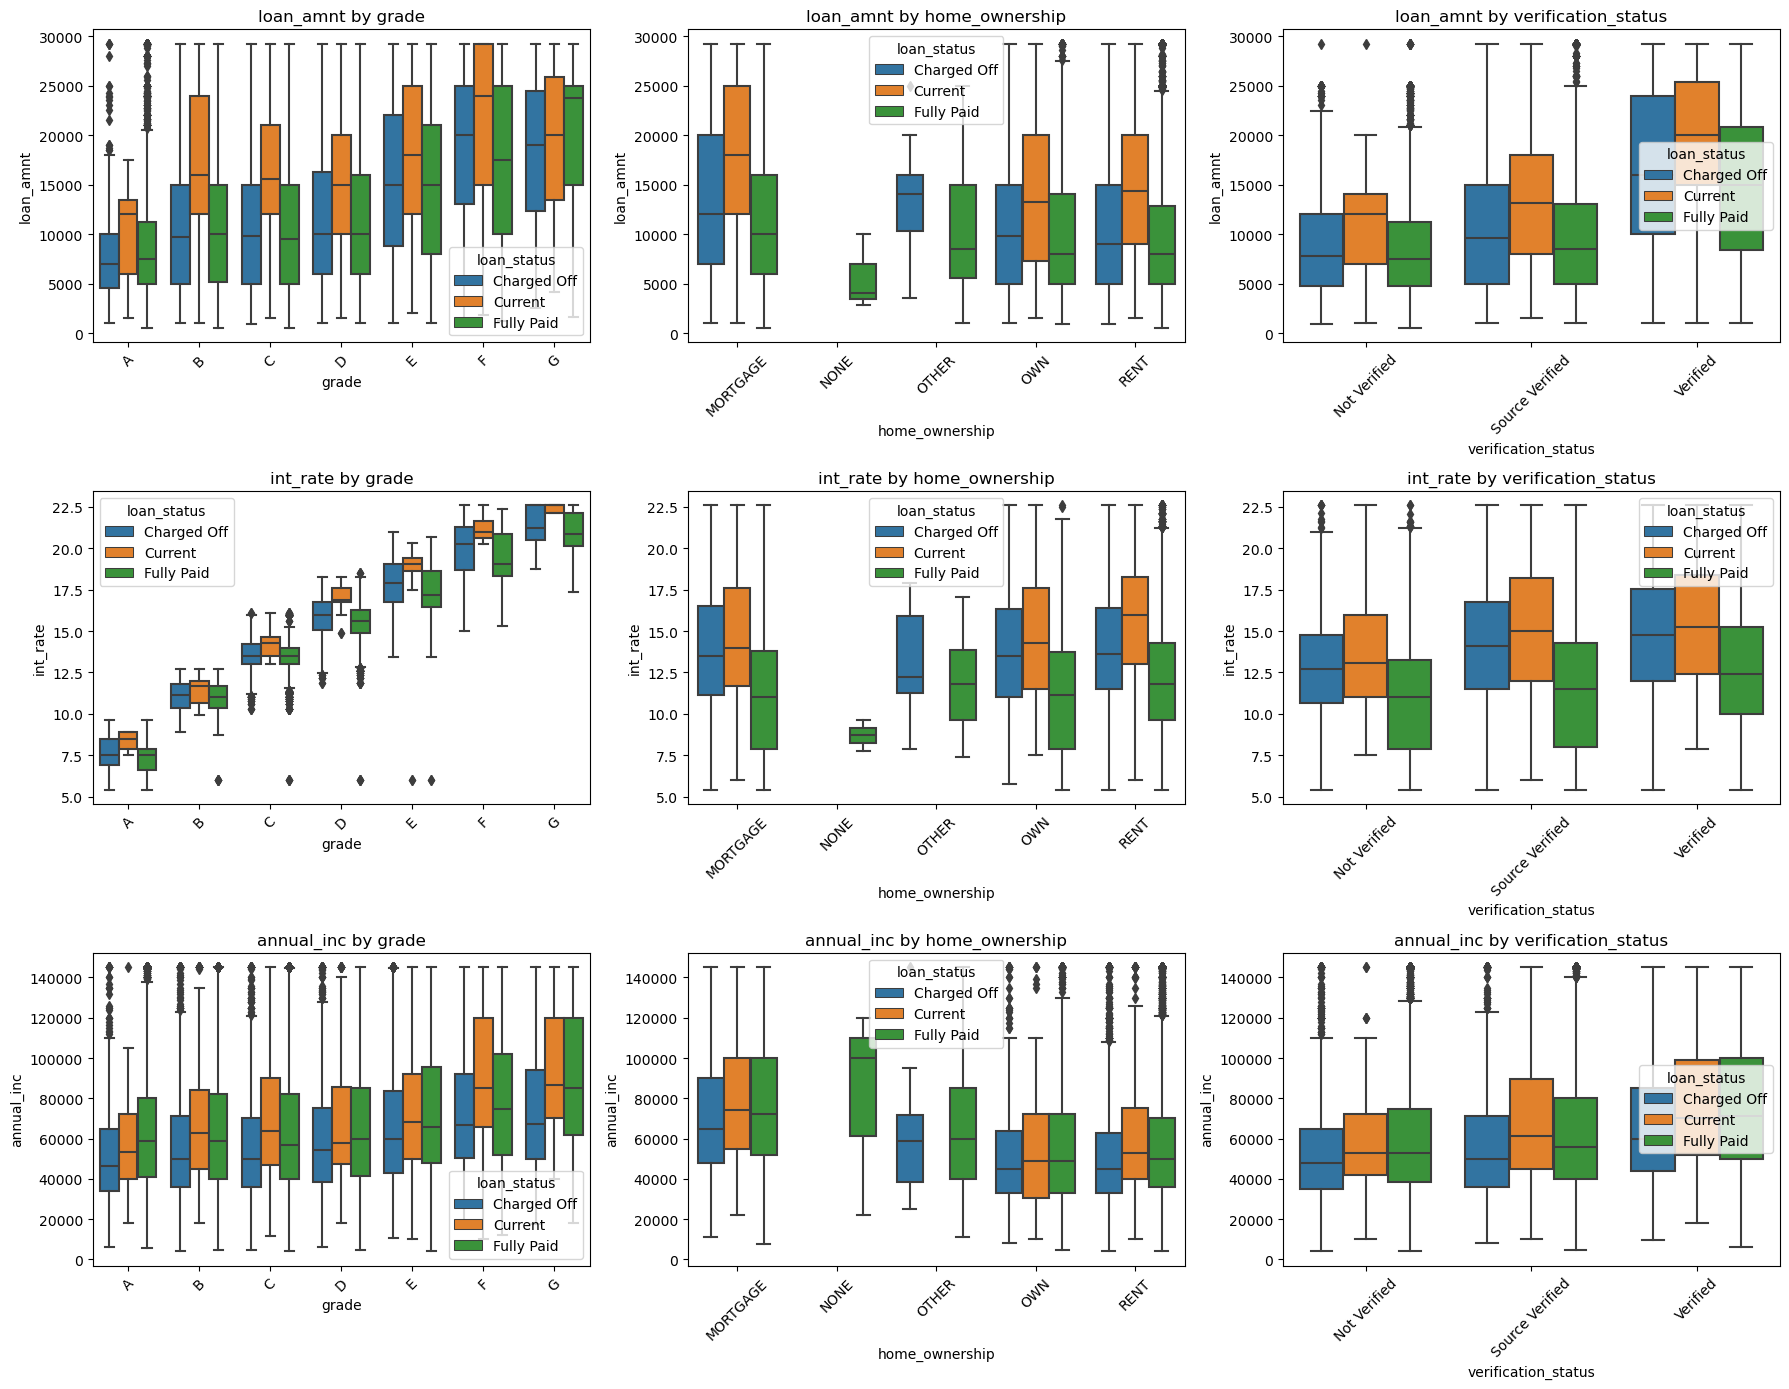

In [29]:
# 3.2.2 Numerical vs. categorical
plt.figure(figsize=(18, 14))
numerical_vars = ['loan_amnt', 'int_rate', 'annual_inc']
categorical_vars = ['grade', 'home_ownership', 'verification_status']

for i, num_var in enumerate(numerical_vars):
    for j, cat_var in enumerate(categorical_vars):
        plt.subplot(len(numerical_vars), len(categorical_vars), i * len(categorical_vars) + j + 1)
        sns.boxplot(data=data, x=cat_var, y=num_var, hue='loan_status')
        plt.title(f'{num_var} by {cat_var}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
grouped_data = data.groupby('loan_status')[req_numerical_columns].mean()
print(grouped_data)

                loan_amnt   funded_amnt  funded_amnt_inv   int_rate  \
loan_status                                                           
Charged Off  11974.689469  11654.513951     10759.955557  13.815222   
Current      16593.048246  16161.140351     15943.580619  15.023623   
Fully Paid   10771.291238  10542.131021     10027.455977  11.609127   

             installment  emp_length    annual_inc        dti  delinq_2yrs  \
loan_status                                                                  
Charged Off   333.456274    5.048425  59907.439264  14.025944          0.0   
Current       392.693018    6.007018  71902.531772  14.750009          0.0   
Fully Paid    316.872721    4.895202  65963.664064  13.148801          0.0   

             inq_last_6mths  ...  recoveries  collection_recovery_fee  \
loan_status                  ...                                        
Charged Off        0.953915  ...         0.0                      0.0   
Current            0.725439  ...  

In [31]:
# 3.2.3  Categorical vs. Categorical

# Revised list of categorical pairs based on chi-square test p-values
categorical_pairs = [
    ('term', 'grade'),
    ('purpose', 'verification_status'),
    ('home_ownership', 'addr_state'),
    ('grade', 'verification_status')
]

# Cross-tabulations and chi-square tests for categorical variables
for cat_var1, cat_var2 in categorical_pairs:
    cross_tab = pd.crosstab(data[cat_var1], data[cat_var2])
    print(f'Cross-tabulation between {cat_var1} and {cat_var2}:\n', cross_tab)
    
    # Chi-square test
    chi2, p, dof, expected = chi2_contingency(cross_tab)
    print(f'Chi-square test result for {cat_var1} and {cat_var2}: p-value = {p}\n')

Cross-tabulation between term and grade:
 grade     A     B     C     D     E    F    G
term                                         
36     9643  9318  5729  3221   864  210   56
60      435  2687  2344  2073  1969  837  258
Chi-square test result for term and grade: p-value = 0.0

Cross-tabulation between purpose and verification_status:
 verification_status  Not Verified  Source Verified  Verified
purpose                                                     
car                           819              458       272
credit_card                  2266             1201      1660
debt_consolidation           7302             4591      6719
educational                   228               31        63
home_improvement             1224              741      1008
house                         137               99       143
major_purchase               1051              600       531
medical                       305              205       182
moving                        240              

In [32]:
# 3.3 creation of metrics

#3.3.1 Business-driven Metrics
data['dti_improvement'] = data['total_pymnt'] / data['annual_inc']

# Calculate Annual Installment Percentage
data['annual_installment_pct'] = data['installment'] * 12 / data['annual_inc']

# Categorize Employment Length
emp_length_bins = [-1, 1, 5, 10, 20]
emp_length_labels = ['<1 year', '1-5 years', '5-10 years', '>10 years']
data['emp_length_cat'] = pd.cut(data['emp_length'], bins=emp_length_bins, labels=emp_length_labels)






# 3.3.2 Type-driven Metrics
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from scipy.stats import zscore

# Log Transformation for skewed variables
data['log_annual_inc'] = np.log1p(data['annual_inc'])
data['log_revol_bal'] = np.log1p(data['revol_bal'])

# Ordinal Encoding for categorical variables
ordinal_vars = ['grade', 'sub_grade']
ordinal_encoder = OrdinalEncoder()
data[ordinal_vars] = ordinal_encoder.fit_transform(data[ordinal_vars])


# Calculate Z-score for numerical variables to identify outliers
numerical_vars = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'revol_bal']
data['zscore_loan_amnt'] = zscore(data['loan_amnt'])
data['zscore_annual_inc'] = zscore(data['annual_inc'])
data['zscore_int_rate'] = zscore(data['int_rate'])
data['zscore_dti'] = zscore(data['dti'])
data['zscore_revol_bal'] = zscore(data['revol_bal'])






#3.3.3  Data-driven Metrics
# Interaction Terms
data['int_rate_dti'] = data['int_rate'] * data['dti']
data['loan_amnt_annual_inc'] = data['loan_amnt'] / data['annual_inc']

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, 0 to 39716
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id                          39644 non-null  int64         
 1   member_id                   39644 non-null  float64       
 2   loan_amnt                   39644 non-null  float64       
 3   funded_amnt                 39644 non-null  float64       
 4   funded_amnt_inv             39644 non-null  float64       
 5   term                        39644 non-null  category      
 6   int_rate                    39644 non-null  float64       
 7   installment                 39644 non-null  float64       
 8   grade                       39644 non-null  float64       
 9   sub_grade                   39644 non-null  float64       
 10  emp_title                   39644 non-null  object        
 11  emp_length                  39644 non-null  float64       
